
## Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from io import StringIO

# from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, LinearSVR
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('./clean_data_3.csv', index_col=0)

In [3]:
# ngrams = pd.read_csv('./ngram_df.csv', index_col=0)

In [4]:
# words = pd.read_csv('./words_df.csv', index_col=0)

In [5]:
df.head(3)

,brand,description,item_id,status,title,url,original_price,new_price,tag_1,tag_3,...,tag_2_Makeup,tag_2_Pants,tag_2_Shoes,tag_2_Shorts,tag_2_Skirts,tag_2_Sweaters,tag_2_Swim,tag_2_Tops,clean_title,clean_description
0,Zenana Outfitters,"Zenana Premium shirt, size large, came from a ...",5c76992f819e9019dc35783d,Buy Now,Zenana Premium shirt,https://poshmark.com/listing/Zenana-Premium-sh...,25.0,13.0,Women,Blouses,...,0,0,0,0,0,0,0,1,zenana premium shirt,zenana premium shirt size large came from a lo...
1,Dansko,Like New\nOnly worn a few times\nNo wear signs...,5c76989bfe5151cc53579bce,Buy Now,Dansko Black Leather Mary Janes,https://poshmark.com/listing/Dansko-Black-Leat...,0.0,25.0,Women,NaN,...,0,0,0,0,0,0,0,0,dansko black leather mary janes,like new only worn a few time no wear sign doe...
2,Matisse,Amazing pair of leopard print pony hair wedge ...,5c7694f9df03079e3a8c89cf,Buy Now,Matisse Leopard Wedge Bootie,https://poshmark.com/listing/Matisse-Leopard-W...,215.0,80.0,Women,AnkleBoots&Booties,...,0,0,1,0,0,0,0,0,matisse leopard wedge bootie,amazing pair of leopard print pony hair wedge ...


In [6]:
# Check again for nulls
try:
    ind = df[df['clean_title'].isnull()].index[0]
    print('There are nulls...')
    print('Null values by index:', ind)
    
except:
    print('No nulls')
    pass

No nulls


In [7]:
# Drop nulls if they exist
try:
    df.drop(index=ind, inplace=True)
    df.reset_index(inplace=True, drop=True)
except:
    pass

In [8]:
df[df['clean_description'].isnull()].head()

,brand,description,item_id,status,title,url,original_price,new_price,tag_1,tag_3,...,tag_2_Makeup,tag_2_Pants,tag_2_Shoes,tag_2_Shorts,tag_2_Skirts,tag_2_Sweaters,tag_2_Swim,tag_2_Tops,clean_title,clean_description
591,Pandora,🤩,5c75f114951996e7c42404b4,Buy Now,Authentic Very Rare Pandora Cell Phone Charm!,https://poshmark.com/listing/Authentic-Very-Ra...,0.0,50.0,Women,Bracelets,...,0,0,0,0,0,0,0,0,authentic very rare pandora cell phone charm,NaN
810,NaN,.,5c73161d035cf1ee818d617e,Buy Now,Miscellaneous shirts.,https://poshmark.com/listing/Miscellaneous-shi...,200.0,30.0,Women,Tees-ShortSleeve,...,0,0,0,0,0,0,0,1,miscellaneous shirt,NaN
3422,Maxine of Hollywood,.,5c5a6925aaa5b85fc3b76a58,Buy Now,Maxine of Hollywood Swimdress Size 12,https://poshmark.com/listing/Maxine-of-Hollywo...,54.0,26.0,Women,OnePieces,...,0,0,0,0,0,0,1,0,maxine of hollywood swimdress size 12,NaN
5003,Liz Claiborne,.,5c549902c9bf50179c49e725,Buy Now,LIZ CLAIBORNE,https://poshmark.com/listing/LIZ-CLAIBORNE-5c5...,48.0,7.0,Women,Crew&ScoopNecks,...,0,0,0,0,0,1,0,0,liz claiborne,NaN
5558,NaN,-,5c53e2962e1478c2bc40be4e,Buy Now,The Beatles Tee,https://poshmark.com/listing/The-Beatles-Tee-5...,25.0,20.0,Women,Tees-ShortSleeve,...,0,0,0,0,0,0,0,1,the beatles tee,NaN


In [9]:
# Replace null descriptions with a question mark
df['clean_description'].fillna('?', inplace=True)

In [10]:
# # Drop all rows under following condition & reset index
# df = df[df['original_price'] > 3]
# df.reset_index(inplace=True, drop=True)

In [11]:
# Create `percent_change` column
df['percent_off'] = 1 - (df['new_price']/df['original_price'])

In [12]:
df.tail(1)

,brand,description,item_id,status,title,url,original_price,new_price,tag_1,tag_3,...,tag_2_Pants,tag_2_Shoes,tag_2_Shorts,tag_2_Skirts,tag_2_Sweaters,tag_2_Swim,tag_2_Tops,clean_title,clean_description,percent_off
10271,Nike,NEW WOMENS NIKE AIR MAX 95’ SE GLITTER,5c48fe4003087c8aaef53fab,Buy Now,NEW WOMENS NIKE AIR MAX 95’ SE GLITTER,https://poshmark.com/listing/NEW-WOMENS-NIKE-A...,170.0,75.0,Women,Sneakers,...,0,1,0,0,0,0,0,new woman nike air max 95 se glitter,new woman nike air max 95 se glitter,0.558824


In [13]:
# Create different buckets for percent change
df['percent_off_bucket'] = pd.cut(df.percent_off, 
                                   [-1,0, 0.2, 0.4, 0.6, 0.8, 1.0],
#                                 [-1,0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                   include_lowest=True,
                                    right=False)

In [14]:
df.head(3)

,brand,description,item_id,status,title,url,original_price,new_price,tag_1,tag_3,...,tag_2_Shoes,tag_2_Shorts,tag_2_Skirts,tag_2_Sweaters,tag_2_Swim,tag_2_Tops,clean_title,clean_description,percent_off,percent_off_bucket
0,Zenana Outfitters,"Zenana Premium shirt, size large, came from a ...",5c76992f819e9019dc35783d,Buy Now,Zenana Premium shirt,https://poshmark.com/listing/Zenana-Premium-sh...,25.0,13.0,Women,Blouses,...,0,0,0,0,0,1,zenana premium shirt,zenana premium shirt size large came from a lo...,0.480000,"[0.4, 0.6)"
1,Dansko,Like New\nOnly worn a few times\nNo wear signs...,5c76989bfe5151cc53579bce,Buy Now,Dansko Black Leather Mary Janes,https://poshmark.com/listing/Dansko-Black-Leat...,0.0,25.0,Women,NaN,...,0,0,0,0,0,0,dansko black leather mary janes,like new only worn a few time no wear sign doe...,-inf,NaN
2,Matisse,Amazing pair of leopard print pony hair wedge ...,5c7694f9df03079e3a8c89cf,Buy Now,Matisse Leopard Wedge Bootie,https://poshmark.com/listing/Matisse-Leopard-W...,215.0,80.0,Women,AnkleBoots&Booties,...,1,0,0,0,0,0,matisse leopard wedge bootie,amazing pair of leopard print pony hair wedge ...,0.627907,"[0.6, 0.8)"


In [15]:
# Create category_id column
df['category_id'] = df['percent_off_bucket'].factorize()[0]

In [16]:
df.head()

,brand,description,item_id,status,title,url,original_price,new_price,tag_1,tag_3,...,tag_2_Shorts,tag_2_Skirts,tag_2_Sweaters,tag_2_Swim,tag_2_Tops,clean_title,clean_description,percent_off,percent_off_bucket,category_id
0,Zenana Outfitters,"Zenana Premium shirt, size large, came from a ...",5c76992f819e9019dc35783d,Buy Now,Zenana Premium shirt,https://poshmark.com/listing/Zenana-Premium-sh...,25.0,13.0,Women,Blouses,...,0,0,0,0,1,zenana premium shirt,zenana premium shirt size large came from a lo...,0.480000,"[0.4, 0.6)",0
1,Dansko,Like New\nOnly worn a few times\nNo wear signs...,5c76989bfe5151cc53579bce,Buy Now,Dansko Black Leather Mary Janes,https://poshmark.com/listing/Dansko-Black-Leat...,0.0,25.0,Women,NaN,...,0,0,0,0,0,dansko black leather mary janes,like new only worn a few time no wear sign doe...,-inf,NaN,-1
2,Matisse,Amazing pair of leopard print pony hair wedge ...,5c7694f9df03079e3a8c89cf,Buy Now,Matisse Leopard Wedge Bootie,https://poshmark.com/listing/Matisse-Leopard-W...,215.0,80.0,Women,AnkleBoots&Booties,...,0,0,0,0,0,matisse leopard wedge bootie,amazing pair of leopard print pony hair wedge ...,0.627907,"[0.6, 0.8)",1
3,RACHEL Rachel Roy,NWOT never worn \nDark blue with a fun Print a...,5c76988b2beb796fd0bc2e98,Buy Now,Label Rachel Roy Pumps 👠!!!,https://poshmark.com/listing/Label-Rachel-Roy-...,90.0,20.0,Women,Heels,...,0,0,0,0,0,label rachel roy pump,nwot never worn dark blue with a fun print and...,0.777778,"[0.6, 0.8)",1
4,Vineyard Vines,NWOT..SOOO NICE..WHITE W/PINK SHELLS STRETCH J...,5c7699116a0bb7e69816a8d8,Buy Now,VINEYARD VINES..NWOT..SIZE 6,https://poshmark.com/listing/VINEYARD-VINESNWO...,108.0,45.0,Women,Ankle&Cropped,...,0,0,0,0,0,vineyard vine nwot size 6,nwot sooo nice white w pink shell stretch jean...,0.583333,"[0.4, 0.6)",0


In [17]:
# Cleaning
category_id_df = df[['percent_off_bucket', 
                     'category_id']].drop_duplicates().sort_values('category_id')


In [18]:
# Create dict
category_to_id = dict(category_id_df.items())

id_to_category = dict(category_id_df[['category_id', 
                                      'percent_off_bucket']].values)


In [19]:
df.head()

,brand,description,item_id,status,title,url,original_price,new_price,tag_1,tag_3,...,tag_2_Shorts,tag_2_Skirts,tag_2_Sweaters,tag_2_Swim,tag_2_Tops,clean_title,clean_description,percent_off,percent_off_bucket,category_id
0,Zenana Outfitters,"Zenana Premium shirt, size large, came from a ...",5c76992f819e9019dc35783d,Buy Now,Zenana Premium shirt,https://poshmark.com/listing/Zenana-Premium-sh...,25.0,13.0,Women,Blouses,...,0,0,0,0,1,zenana premium shirt,zenana premium shirt size large came from a lo...,0.480000,"[0.4, 0.6)",0
1,Dansko,Like New\nOnly worn a few times\nNo wear signs...,5c76989bfe5151cc53579bce,Buy Now,Dansko Black Leather Mary Janes,https://poshmark.com/listing/Dansko-Black-Leat...,0.0,25.0,Women,NaN,...,0,0,0,0,0,dansko black leather mary janes,like new only worn a few time no wear sign doe...,-inf,NaN,-1
2,Matisse,Amazing pair of leopard print pony hair wedge ...,5c7694f9df03079e3a8c89cf,Buy Now,Matisse Leopard Wedge Bootie,https://poshmark.com/listing/Matisse-Leopard-W...,215.0,80.0,Women,AnkleBoots&Booties,...,0,0,0,0,0,matisse leopard wedge bootie,amazing pair of leopard print pony hair wedge ...,0.627907,"[0.6, 0.8)",1
3,RACHEL Rachel Roy,NWOT never worn \nDark blue with a fun Print a...,5c76988b2beb796fd0bc2e98,Buy Now,Label Rachel Roy Pumps 👠!!!,https://poshmark.com/listing/Label-Rachel-Roy-...,90.0,20.0,Women,Heels,...,0,0,0,0,0,label rachel roy pump,nwot never worn dark blue with a fun print and...,0.777778,"[0.6, 0.8)",1
4,Vineyard Vines,NWOT..SOOO NICE..WHITE W/PINK SHELLS STRETCH J...,5c7699116a0bb7e69816a8d8,Buy Now,VINEYARD VINES..NWOT..SIZE 6,https://poshmark.com/listing/VINEYARD-VINESNWO...,108.0,45.0,Women,Ankle&Cropped,...,0,0,0,0,0,vineyard vine nwot size 6,nwot sooo nice white w pink shell stretch jean...,0.583333,"[0.4, 0.6)",0


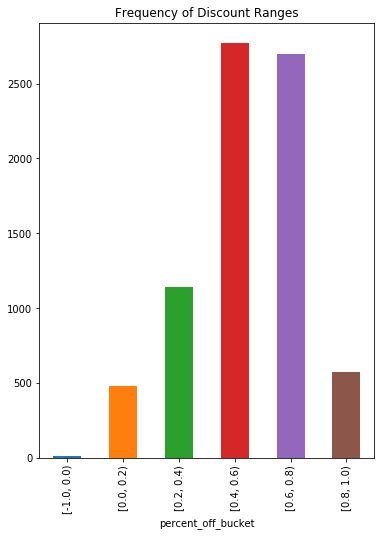

In [20]:
plt.figure(figsize=[6,8])
plt.title('Frequency of Discount Ranges')

df.groupby('percent_off_bucket').clean_description.count().plot.bar(ylim=0)

plt.show();

#### `train_test_split`

In [21]:
cols = list(df.columns)

In [22]:
variables = cols[10:28]

In [23]:
variables

['title_emoji',
 'description_emoji',
 'tag_2_Bags',
 'tag_2_Dresses',
 'tag_2_Intimates&Sleepwear',
 'tag_2_Jackets&Coats',
 'tag_2_Jeans',
 'tag_2_Jewelry',
 'tag_2_Makeup',
 'tag_2_Pants',
 'tag_2_Shoes',
 'tag_2_Shorts',
 'tag_2_Skirts',
 'tag_2_Sweaters',
 'tag_2_Swim',
 'tag_2_Tops',
 'clean_title',
 'clean_description']

In [24]:
X = df['clean_description']
y = df['category_id']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                   random_state=42)

#### `CountVectorizer()`

In [26]:
count_vect = CountVectorizer(ngram_range=(1, 2))

X_train_vect = count_vect.fit_transform(X_train)
X_test_vect = count_vect.transform(X_test)

#### `Logistic Regression`

In [27]:
tfv = TfidfVectorizer(min_df=2,
                     max_features=None,
                     strip_accents='unicode',
                     analyzer='word',
                     token_pattern=r'\w{1,}',
                     ngram_range=(1,3),
                     use_idf=1,
                     smooth_idf=1,
                     sublinear_tf=1,
                     stop_words='english')

In [28]:
X_train_tfv = tfv.fit(X_train)
X_test_tfv = tfv.fit(X_test)

In [29]:
y_train.shape

(7704,)

In [30]:
X_train_tfv = tfv.fit_transform(X_train)
X_test_tfv = tfv.transform(X_test)

In [31]:
set(y_train)

{-1, 0, 1, 2, 3, 4, 5}

In [32]:
y_train=y_train.astype('str')
y_test=y_test.astype('str')

In [33]:
lr = LogisticRegression()
lr.fit(X_train_tfv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
lr.score(X_train_tfv, y_train)

0.661993769470405

In [35]:
lr.score(X_test_tfv, y_test)

0.3317757009345794

In [36]:
y_pred = lr.predict(X_test_tfv)

In [37]:
accuracy_score(y_test, y_pred)

0.3317757009345794

#### `DecisionTreeeClassifier()`

In [38]:
tree = DecisionTreeClassifier(criterion='gini',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=100)

In [39]:
tree.fit(X_train_vect, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
tree.score(X_train_vect, y_train)

0.3417705088265836

In [41]:
tree.score(X_test_vect, y_test)

0.30568535825545173

#### `Logistic Regression`

In [42]:
tfv = TfidfVectorizer(min_df=2,
                     max_features=None,
                     strip_accents='unicode',
                     analyzer='word',
                     token_pattern=r'\w{1,}',
                     ngram_range=(1,3),
                     use_idf=1,
                     smooth_idf=1,
                     sublinear_tf=1,
                     stop_words='english')

In [43]:
X_train_tfv = tfv.fit(X_train)
X_test_tfv = tfv.fit(X_test)

In [44]:
y_train.shape

(7704,)

In [45]:
X_train_tfv = tfv.fit_transform(X_train)
X_test_tfv = tfv.transform(X_test)

In [46]:
set(y_train)

{'-1', '0', '1', '2', '3', '4', '5'}

In [47]:
y_train=y_train.astype('str')
y_test=y_test.astype('str')

In [48]:
lr = LogisticRegression()
lr.fit(X_train_tfv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
lr.score(X_train_tfv, y_train)

0.661993769470405

In [50]:
lr.score(X_test_tfv, y_test)

0.3317757009345794

In [51]:
y_pred = lr.predict(X_test_tfv)

In [52]:
accuracy_score(y_test, y_pred)

0.3317757009345794

In [58]:
df.to_csv('./modeling_data')